In [1]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install numpy
!pip install html5lib
import html5lib
import pandas as pd

     |████████████████████████████████| 122kB 773kB/s eta 0:00:01


In [3]:
!pip install lxml

     |████████████████████████████████| 5.8MB 5.0MB/s eta 0:00:01     |▉                               | 153kB 1.2MB/s eta 0:00:05     |█████▊                          | 1.0MB 1.2MB/s eta 0:00:05     |████████▉                       | 1.6MB 1.2MB/s eta 0:00:04     |██████████████                  | 2.5MB 1.2MB/s eta 0:00:03     |████████████████▌               | 3.0MB 1.2MB/s eta 0:00:03     |██████████████████████▍         | 4.0MB 1.2MB/s eta 0:00:02


installing appropriate packages

# Part 1

## Step 1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas
import lxml
import re
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
spaceWeather = requests.get(url)

using requests to get url of spaceweatherlive.com

In [90]:
spaceWeather_Parced = BeautifulSoup(spaceWeather.text, 'html.parser')
#search for table tags
table = spaceWeather_Parced.find('table')

#reads from html and prettifys 'table'
read = pd.read_html(table.prettify())
read
table1=read[0]
#rename columns
spaceWeather_table = table1.rename(columns = {'Unnamed: 1':'x_classification','Unnamed: 2':'Date', 'Unnamed: 7':"Movie"})
#create rank column
spaceWeather_table['rank'] = spaceWeather_table.index

#reorganize columns
#spaceWeather_table = spaceWeather_table[['rank', 'x_classification', 'Date', 'Region','Start', 'Maximum', 'End', 'Movie']]
spaceWeather_table

,Unnamed: 0,x_classification,Date,Region,Start,Maximum,End,Movie,rank
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06,Movie View archive,0
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive,1
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive,2
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03,Movie View archive,3
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive,4
5,6,X10.0,2003/10/29,486,20:37,20:49,21:01,Movie View archive,5
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive,6
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive,7
8,9,X9.0,2006/12/05,930,10:18,10:35,10:45,Movie View archive,8
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive,9


space weather is parced using beatiful soup and an html parcer and .find is used to locate the table tag.
Prettify is used to create a dataframe, then the columns are appropriately named and a rank column is added.  Below the movie column is dropped

In [240]:
#drops movie column
spaceWeather_table.drop(columns =["Movie"])
spaceWeather_table.dtypes

rank                 int64
x_classification    object
Date                object
Region               int64
Start               object
Maximum             object
End                 object
Movie               object
dtype: object

## step two

In [171]:
import datetime
import re
dateTimeList = []
for d in spaceWeather_table['Date']:
    date = re.split('/', d)
    dateObject = datetime.datetime(
        int(date[0]),
        int(date[1]),
        int(date[2]))
    dateTimeList.append(dateObject)
spaceWeather_table['Date'] = dateTimeList

The Date column of the spaceweather dataframe is split on '/' and is converted into a datetime.  A datetime list is created and the Date column is iterated through and are converted into datetimes which are then appended to the datetime list.  The Date column values are then set to the datetime list

In [172]:
startList = []
for d in range(len(spaceWeather_table['Date'])):
    startTime = re.split(':', spaceWeather_table['Start'].iloc[d])
    startDate = datetime.datetime(
        spaceWeather_table['Date'].iloc[d].year,
        spaceWeather_table['Date'].iloc[d].month,
        spaceWeather_table['Date'].iloc[d].day,
        int(startTime[0]),
        int(startTime[1]))
    startList.append(startDate)
spaceWeather_table['Start'] = startList


Like with the Date column a list is created for start times.  Start times are split at ':' and we iterate through startDate to convert the values into datetimes using the previous datetimes from the 'Date' column.  These values are appended to the startList and the spaceweather dataframe's 'Start' column is set to the list's values

In [173]:
endList = []
for d in range(len(spaceWeather_table['Date'])):
    endTime = re.split(':', spaceWeather_table['End'].iloc[d])
    endDate = datetime.datetime(
        spaceWeather_table['Date'].iloc[d].year,
        spaceWeather_table['Date'].iloc[d].month,
        spaceWeather_table['Date'].iloc[d].day,
        int(startTime[0]),
        int(startTime[1]))
    endList.append(startDate)
spaceWeather_table['End'] = endList


same method to convert to datetimes as with start times but with endtimes

In [174]:
spaceWeather_table

,Unnamed: 0,x_classification,Date,Region,Start,Maximum,End,Movie,rank
0,1,X28.0,2003-11-04,486,2003-11-04 19:29:00,19:53,1997-11-27 12:59:00,Movie View archive,0
1,2,X20.0,2001-04-02,9393,2001-04-02 21:32:00,21:51,1997-11-27 12:59:00,Movie View archive,1
2,3,X17.2,2003-10-28,486,2003-10-28 09:51:00,11:10,1997-11-27 12:59:00,Movie View archive,2
3,4,X17.0,2005-09-07,808,2005-09-07 17:17:00,17:40,1997-11-27 12:59:00,Movie View archive,3
4,5,X14.4,2001-04-15,9415,2001-04-15 13:19:00,13:50,1997-11-27 12:59:00,Movie View archive,4
5,6,X10.0,2003-10-29,486,2003-10-29 20:37:00,20:49,1997-11-27 12:59:00,Movie View archive,5
6,7,X9.4,1997-11-06,8100,1997-11-06 11:49:00,11:55,1997-11-27 12:59:00,Movie View archive,6
7,8,X9.3,2017-09-06,2673,2017-09-06 11:53:00,12:02,1997-11-27 12:59:00,Movie View archive,7
8,9,X9.0,2006-12-05,930,2006-12-05 10:18:00,10:35,1997-11-27 12:59:00,Movie View archive,8
9,10,X8.3,2003-11-02,486,2003-11-02 17:03:00,17:25,1997-11-27 12:59:00,Movie View archive,9


In [245]:
spaceWeather_table.dtypes

rank                         int64
x_classification            object
Date                datetime64[ns]
Region                       int64
Start               datetime64[ns]
Maximum                     object
End                 datetime64[ns]
Movie                       object
dtype: object

## Step 3

In [401]:
url = 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
nasa = requests.get(url)
nasa_parced = BeautifulSoup(nasa.text, 'html.parser')
#a_tag = nasa_parced.find('a')
#nasa_parced = nasa_parced.get_text()
#nasa_parced
#nasa_parced = re.split('http\S+', nasa_parced.get_text())
nasa_parced = nasa_parced.get_text()
nasa_parced = re.sub(' +', ' ',nasa_parced)
nasa_parced = re.split("\n", nasa_parced)
nasa_parced = nasa_parced[15:-4]
nasa_parced = pd.DataFrame(nasa_parced)
nasa_parced
nasa_split=nasa_parced[0].str.split(pat="\s", n=14, expand=True)
nasa_split
nasa_split = nasa_split.rename(columns = {0:'start_date',1:'start_time', 2:'cme_date', 
                                          3:'end_time',4:'start_frequency',5:'end_frequency',
                                          6:'flare_location',7:'flare_region',8:'importance',
                                          9: 'end_date', 10: 'cme_time', 11: 'cpa', 12:'width', 13:'speed'
                                          })
nasa_split = nasa_split.drop(columns =[14])
nasa_split

,start_date,start_time,cme_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,end_date,cme_time,cpa,width,speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2016/02/05,20:28,02/05,23:31,1650,500,------,-----,----,--/--,--:--,----,---,----
507,2016/02/05,22:35,02/05,22:55,5200,1900,------,-----,----,02/05,21:24,193,155,445
508,2016/05/04,14:20,05/04,14:34,14000,10500,N06W61,12535,C1.3,05/04,14:12,255,134,390
509,2016/05/24,17:00,05/24,20:50,1500,700,------,-----,----,--/--,--:--,----,---,----


text is pulled from the url of the nasa website which is then parced using beutiful soup. .get_text() is used to remove the hyperlinks from the text.  Elements with more than one whitespace are reduced to one whitespace.  The text is then split on new lines to create rows and irrelevant rows are removed. A dataframe is created and is split on whitespace to create columns.  The columns are then appropriately renamed

In [402]:
nasa_split.dtypes

start_date         object
start_time         object
cme_date           object
end_time           object
start_frequency    object
end_frequency      object
flare_location     object
flare_region       object
importance         object
end_date           object
cme_time           object
cpa                object
width              object
speed              object
dtype: object

## Step 4

In [331]:
nasa_split.end_time.unique()

array(['14:15', '17:30', '16:00', '22:00', '22:16', '12:00', '11:30',
       '04:30', '08:30', '14:00', '23:20', '15:18', '03:52', '06:00',
       '15:30', '09:25', '10:00', '17:00', '14:50', '08:35', '14:20',
       '10:20', '21:00', '20:00', '09:20', '14:40', '08:00', '05:30',
       '00:50', '18:15', '00:00', '08:45', '09:00', '01:00', '18:40',
       '07:10', '07:14', '21:10', '19:55', '04:05', '18:33', '04:10',
       '07:35', '23:33', '03:48', '05:34', '20:24', '19:34', '02:20',
       '02:00', '22:12', '09:54', '14:03', '16:48', '06:58', '23:45',
       '13:00', '24:00', '23:42', '22:15', '18:45', '19:56', '04:15',
       '01:22', '15:05', '23:30', '13:30', '20:35', '14:30', '12:45',
       '11:59', '12:20', '19:00', '10:30', '03:00', '22:35', '04:00',
       '21:06', '15:00', '22:36', '02:25', '19:35', '20:25', '17:15',
       '13:38', '19:16', '01:55', '04:32', '05:45', '03:15', '15:20',
       '02:30', '07:25', '10:10', '01:50', '10:40', '05:00', '13:50',
       '00:12', '01:

In [332]:
import numpy as np
nasa_split = nasa_split.replace('BACK', 'Back')
nasa_split = nasa_split.replace('Back?', 'Back')
nasa_split = nasa_split.replace('------', np.nan)

nasa_split = nasa_split.replace('DSF', 'FILA')
nasa_split = nasa_split.replace('-----', np.nan)
nasa_split = nasa_split.replace('----',  np.nan)
nasa_split = nasa_split.replace('--/--',  np.nan)
nasa_split = nasa_split.replace('--:--',  np.nan)
nasa_split = nasa_split.replace('---',  np.nan)
nasa_split = nasa_split.replace('nan',  np.nan)

Appropriate values are replaced with NaN or other values

In [333]:
nasa_split['Halo'] = nasa_split['cpa']
def halof(s):
    if s == 'Halo':
        return True
    else:
        return False

def halor(s):
    s = str(s)
    if s =='Halo':
        return np.nan
    else:
        return float(s)
    
nasa_split['Halo'] = nasa_split['Halo'].apply(halof)
nasa_split['cpa'] = nasa_split['cpa'].apply(halor)

nasa_split

# copying width into new lower bound column
nasa_split['lower_bound'] = nasa_split['width']

#function for finding lower bound that returns boolean
def lower(s):
    s = str(s)
    if s[0]== '>':
        return True
    else:
        return False

#applying function to lowerbound column
nasa_split['lower_bound'] = nasa_split['lower_bound'].apply(lower)
nasa_split

#applying funtion to remove > sign in witdth
def replaceg(s):
    s = str(s)
    s = re.sub("h","",s)
    if s[0]== '>':
        s = s.replace('>','')
        return float(s)
    else:
        return float(s)

nasa_split['width'] = nasa_split['width'].apply(replaceg)
nasa_split

,start_date,start_time,cme_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,end_date,cme_time,cpa,width,speed,Halo,lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74.0,79.0,312,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360.0,878,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360.0,464,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263.0,165.0,296,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133.0,155.0,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2016/02/05,20:28,02/05,23:31,1650,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
507,2016/02/05,22:35,02/05,22:55,5200,1900,NaN,NaN,NaN,02/05,21:24,193.0,155.0,445,False,False
508,2016/05/04,14:20,05/04,14:34,14000,10500,N06W61,12535,C1.3,05/04,14:12,255.0,134.0,390,False,False
509,2016/05/24,17:00,05/24,20:50,1500,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


A copy of cpa column is created and a boolean function that checks for halos is created and a function that returns nan is a halo is detected is created.  Boolean function is applied to halo copy and NaN function is applied to original cpa column

A copy of the width column is created called 'lower_bound'. A function that searches if the value contains a '>' and returns a boolean is created and applied to the lower_bound column

In [334]:
dateTimeList = []
for d in nasa_split['start_date']:
    date = re.split('/', d)
    dateObject = datetime.datetime(
        int(date[0]),
        int(date[1]),
        int(date[2]))
    dateTimeList.append(dateObject)
nasa_split['start_date'] = dateTimeList
print(dateTimeList)

[datetime.datetime(1997, 4, 1, 0, 0), datetime.datetime(1997, 4, 7, 0, 0), datetime.datetime(1997, 5, 12, 0, 0), datetime.datetime(1997, 5, 21, 0, 0), datetime.datetime(1997, 9, 23, 0, 0), datetime.datetime(1997, 11, 3, 0, 0), datetime.datetime(1997, 11, 3, 0, 0), datetime.datetime(1997, 11, 4, 0, 0), datetime.datetime(1997, 11, 6, 0, 0), datetime.datetime(1997, 11, 27, 0, 0), datetime.datetime(1997, 12, 12, 0, 0), datetime.datetime(1998, 1, 25, 0, 0), datetime.datetime(1998, 3, 29, 0, 0), datetime.datetime(1998, 4, 20, 0, 0), datetime.datetime(1998, 4, 23, 0, 0), datetime.datetime(1998, 4, 24, 0, 0), datetime.datetime(1998, 4, 27, 0, 0), datetime.datetime(1998, 4, 29, 0, 0), datetime.datetime(1998, 5, 2, 0, 0), datetime.datetime(1998, 5, 6, 0, 0), datetime.datetime(1998, 5, 9, 0, 0), datetime.datetime(1998, 5, 11, 0, 0), datetime.datetime(1998, 5, 19, 0, 0), datetime.datetime(1998, 5, 27, 0, 0), datetime.datetime(1998, 6, 11, 0, 0), datetime.datetime(1998, 6, 16, 0, 0), datetime.datet

Start_date is converted into datetime using same method as on spaceweather dataframe

In [335]:
startTimeList = []
temp = []
for d in range(len(nasa_split['start_date'])):
    temp = re.split(':', nasa_split['start_time'].iloc[d])
    startDate = datetime.datetime(
        nasa_split['start_date'].iloc[d].year,
        nasa_split['start_date'].iloc[d].month,
        nasa_split['start_date'].iloc[d].day,
        int(temp[0]),
        int(temp[1]))
    startTimeList.append(startDate)
print(startTimeList)
nasa_split['start_time'] = startTimeList

[datetime.datetime(1997, 4, 1, 14, 0), datetime.datetime(1997, 4, 7, 14, 30), datetime.datetime(1997, 5, 12, 5, 15), datetime.datetime(1997, 5, 21, 20, 20), datetime.datetime(1997, 9, 23, 21, 53), datetime.datetime(1997, 11, 3, 5, 15), datetime.datetime(1997, 11, 3, 10, 30), datetime.datetime(1997, 11, 4, 6, 0), datetime.datetime(1997, 11, 6, 12, 20), datetime.datetime(1997, 11, 27, 13, 30), datetime.datetime(1997, 12, 12, 22, 45), datetime.datetime(1998, 1, 25, 15, 3), datetime.datetime(1998, 3, 29, 3, 40), datetime.datetime(1998, 4, 20, 10, 25), datetime.datetime(1998, 4, 23, 6, 0), datetime.datetime(1998, 4, 24, 9, 17), datetime.datetime(1998, 4, 27, 9, 20), datetime.datetime(1998, 4, 29, 16, 30), datetime.datetime(1998, 5, 2, 14, 25), datetime.datetime(1998, 5, 6, 8, 25), datetime.datetime(1998, 5, 9, 3, 35), datetime.datetime(1998, 5, 11, 21, 40), datetime.datetime(1998, 5, 19, 10, 0), datetime.datetime(1998, 5, 27, 13, 30), datetime.datetime(1998, 6, 11, 10, 15), datetime.datetim

start time is converted into datetime using same method as with spaceweather dataframe except a temporary list was created.

In [336]:
#function for converting 24:00 to 23:59
def time(s):
    s =str(s)
    if s =="24:00":
        return "23:59"
    else:
        return s

#applying function
nasa_split['end_time'] = nasa_split['end_time'].apply(time)

endTimeList = []
temp = []
for d in range(len(nasa_split['start_date'])):
    temp = re.split(':', nasa_split['end_time'].iloc[d])
    endDate = datetime.datetime(
        nasa_split['start_date'].iloc[d].year,
        nasa_split['start_date'].iloc[d].month,
        nasa_split['start_date'].iloc[d].day,
        int(temp[0]),
        int(temp[1]))
    endTimeList.append(endDate)
nasa_split['end_time'] = endTimeList

end time is converted into datetime using same method as with spaceweather dataframe except a temporary list was created and a function that converts '24:00': to '23:59' is created and applied

In [337]:
nasa_split

,start_date,start_time,cme_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,end_date,cme_time,cpa,width,speed,Halo,lower_bound
0,1997-04-01,1997-04-01 14:00:00,04/01,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74.0,79.0,312,False,False
1,1997-04-07,1997-04-07 14:30:00,04/07,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360.0,878,True,False
2,1997-05-12,1997-05-12 05:15:00,05/14,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360.0,464,True,False
3,1997-05-21,1997-05-21 20:20:00,05/21,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263.0,165.0,296,False,False
4,1997-09-23,1997-09-23 21:53:00,09/23,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,133.0,155.0,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2016-02-05,2016-02-05 20:28:00,02/05,2016-02-05 23:31:00,1650,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
507,2016-02-05,2016-02-05 22:35:00,02/05,2016-02-05 22:55:00,5200,1900,NaN,NaN,NaN,02/05,21:24,193.0,155.0,445,False,False
508,2016-05-04,2016-05-04 14:20:00,05/04,2016-05-04 14:34:00,14000,10500,N06W61,12535,C1.3,05/04,14:12,255.0,134.0,390,False,False
509,2016-05-24,2016-05-24 17:00:00,05/24,2016-05-24 20:50:00,1500,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [339]:
#replace nan with empty string
nasa_split['cme_time'] = nasa_split['cme_time'].replace(np.nan, '', regex=True)
cmeTimeList = []
temp = []
for d in range(len(nasa_split['start_date'])):
    if nasa_split['cme_time'].iloc[d] == '':
        cmeTimeList.append(np.nan)
    else:    
        temp = re.split(':', nasa_split['cme_time'].iloc[d])
        cmeDate = datetime.datetime(
            int(nasa_split['start_date'].iloc[d].year),
            int(nasa_split['start_date'].iloc[d].month),
            int(nasa_split['start_date'].iloc[d].day),
            int(temp[0]),
            int(temp[1]))
        cmeTimeList.append(cmeDate)
nasa_split['cme_time'] = cmeTimeList

cme time is converted into datetime using same method as with spaceweather dataframe except a temporary list was created and all nan values are replaced with ''. An if state is included in the for loop that appends nan to the list if the value is ''.

In [340]:
nasa_split

,start_date,start_time,cme_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,end_date,cme_time,cpa,width,speed,Halo,lower_bound
0,1997-04-01,1997-04-01 14:00:00,04/01,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,1997-04-01 15:18:00,74.0,79.0,312,False,False
1,1997-04-07,1997-04-07 14:30:00,04/07,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,1997-04-07 14:27:00,NaN,360.0,878,True,False
2,1997-05-12,1997-05-12 05:15:00,05/14,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,05/12,1997-05-12 05:30:00,NaN,360.0,464,True,False
3,1997-05-21,1997-05-21 20:20:00,05/21,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,1997-05-21 21:00:00,263.0,165.0,296,False,False
4,1997-09-23,1997-09-23 21:53:00,09/23,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,1997-09-23 22:02:00,133.0,155.0,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2016-02-05,2016-02-05 20:28:00,02/05,2016-02-05 23:31:00,1650,500,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False
507,2016-02-05,2016-02-05 22:35:00,02/05,2016-02-05 22:55:00,5200,1900,NaN,NaN,NaN,02/05,2016-02-05 21:24:00,193.0,155.0,445,False,False
508,2016-05-04,2016-05-04 14:20:00,05/04,2016-05-04 14:34:00,14000,10500,N06W61,12535,C1.3,05/04,2016-05-04 14:12:00,255.0,134.0,390,False,False
509,2016-05-24,2016-05-24 17:00:00,05/24,2016-05-24 20:50:00,1500,700,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False


In [403]:
nasa_split = nasa_split.drop(columns =['end_date','cme_date'])

In [348]:
nasa_split = nasa_split.rename(columns ={'start_date':'Date','start_time':'start_datetime','end_time':'end_datetime','cme_time':'cme_datetime',
                                        'Halo':'is_flare'})

In [349]:
nasa_split

,Date,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,lower_bound
0,1997-04-01,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312,False,False
1,1997-04-07,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878,True,False
2,1997-05-12,1997-05-12 05:15:00,1997-05-12 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464,True,False
3,1997-05-21,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296,False,False
4,1997-09-23,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2016-02-05,2016-02-05 20:28:00,2016-02-05 23:31:00,1650,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False
507,2016-02-05,2016-02-05 22:35:00,2016-02-05 22:55:00,5200,1900,NaN,NaN,NaN,2016-02-05 21:24:00,193.0,155.0,445,False,False
508,2016-05-04,2016-05-04 14:20:00,2016-05-04 14:34:00,14000,10500,N06W61,12535,C1.3,2016-05-04 14:12:00,255.0,134.0,390,False,False
509,2016-05-24,2016-05-24 17:00:00,2016-05-24 20:50:00,1500,700,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False


In [350]:
nasa_split.dtypes

Date               datetime64[ns]
start_datetime     datetime64[ns]
end_datetime       datetime64[ns]
start_frequency            object
end_frequency              object
flare_location             object
flare_region               object
importance                 object
cme_datetime       datetime64[ns]
cpa                       float64
width                     float64
speed                      object
is_flare                     bool
lower_bound                  bool
dtype: object

unneeded columns are removed and other columns are renamed

# Part 2

## question 1, replication

In [389]:
#create funciton that replaces letter of importance with number and turns element into variable
def importance(s):
    s =str(s)
    if s[0] == 'A':
        s = '1'+s[1:]
        return float(s)
    elif s[0] =='B':
        s = '2'+s[1:]
        return float(s)
    elif s[0] =='C':
        s = '3'+s[1:]
        return float(s)
    elif s[0] =='M':
        s = '4'+s[1:]
        return float(s)
    elif s[0] =='X':
        s = '5'+s[1:]
        return float(s)  
#applying function on new column
nasa_split['numImportance'] = nasa_split['importance'].apply(importance)

#sorting dataframe by importance
nasa_rank = nasa_split.sort_values(by='numImportance', ascending=False)

#show only top 50
nasa_rank=nasa_rank[0:50]
nasa_rank

,Date,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,lower_bound,numImportance
242,2003-11-04,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657,True,False,528.0
119,2001-04-02,2001-04-02 22:05:00,2001-04-02 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505,False,False,520.0
234,2003-10-28,2003-10-28 11:10:00,2003-10-28 23:59:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459,True,False,517.0
128,2001-04-15,2001-04-15 14:05:00,2001-04-15 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199,False,False,514.0
235,2003-10-29,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029,True,False,510.0
8,1997-11-06,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556,True,False,59.4
330,2006-12-05,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,59.0
238,2003-11-02,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598,True,False,58.3
290,2005-01-20,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360.0,882,True,False,57.1
360,2011-08-09,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360.0,1610,True,False,56.9


I think that the SpaceWeather data was replicated well with the nasa data, importance/rank are the same along with dates.

## Integration question 2

In [392]:
#create flare id on nasa_rank
flare_id = []
for i in range(len(nasa_rank['Date'])):
    flare_id.append(i)    
nasa_rank['flare_id'] = flare_id

#create flare id on space table

flare_id2 = []
for i in range(len(spaceWeather_table['Date'])):
    flare_id2.append(i)    
spaceWeather_table['flare_id'] = flare_id2

#merge on flare id
nasa_merge = nasa_rank.merge(spaceWeather_table, on=["flare_id"], how="inner")
nasa_merge

,Date_x,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,...,flare_id,Unnamed: 0,x_classification,Date_y,Region,Start,Maximum,End,Movie,rank
0,2003-11-04,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,...,0,1,X28.0,2003-11-04,486,2003-11-04 19:29:00,19:53,1997-11-27 12:59:00,Movie View archive,0
1,2001-04-02,2001-04-02 22:05:00,2001-04-02 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,...,1,2,X20.0,2001-04-02,9393,2001-04-02 21:32:00,21:51,1997-11-27 12:59:00,Movie View archive,1
2,2003-10-28,2003-10-28 11:10:00,2003-10-28 23:59:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,...,2,3,X17.2,2003-10-28,486,2003-10-28 09:51:00,11:10,1997-11-27 12:59:00,Movie View archive,2
3,2001-04-15,2001-04-15 14:05:00,2001-04-15 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,...,3,4,X17.0,2005-09-07,808,2005-09-07 17:17:00,17:40,1997-11-27 12:59:00,Movie View archive,3
4,2003-10-29,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,...,4,5,X14.4,2001-04-15,9415,2001-04-15 13:19:00,13:50,1997-11-27 12:59:00,Movie View archive,4
5,1997-11-06,1997-11-06 12:20:00,1997-11-06 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,...,5,6,X10.0,2003-10-29,486,2003-10-29 20:37:00,20:49,1997-11-27 12:59:00,Movie View archive,5
6,2006-12-05,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,...,6,7,X9.4,1997-11-06,8100,1997-11-06 11:49:00,11:55,1997-11-27 12:59:00,Movie View archive,6
7,2003-11-02,2003-11-02 17:30:00,2003-11-02 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,...,7,8,X9.3,2017-09-06,2673,2017-09-06 11:53:00,12:02,1997-11-27 12:59:00,Movie View archive,7
8,2005-01-20,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,...,8,9,X9.0,2006-12-05,930,2006-12-05 10:18:00,10:35,1997-11-27 12:59:00,Movie View archive,8
9,2011-08-09,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,...,9,10,X8.3,2003-11-02,486,2003-11-02 17:03:00,17:25,1997-11-27 12:59:00,Movie View archive,9


A flare id is createdfor the spaceWeather top 50 data and the nasa data top 50 based on just its index location.  The two different dataframes are then merged based on flare id

## analysis plot question3

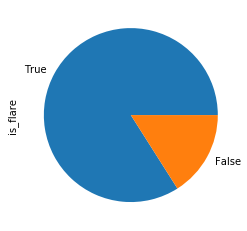

In [394]:
#creating pie chart on is_flare
%matplotlib inline
nasa_counts = nasa_merge.is_flare.value_counts()
nasa_counts.plot.pie()
#flares in top 50 do tend to have halo CME's

Flares in top 50 do tend to have halo CME's.  Purpose of this plot is to show how many of the top 50 flares have halo CME's. Data shows that large majority of top 50 flares have halo CME's. Data is baed on is_flare column.